In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import numpy as np
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
import matplotlib.pyplot as plt

## 1. Create Data

In [4]:
import seaborn as sns

In [5]:
iris = sns.load_dataset("iris")

In [6]:
iris.shape

(150, 5)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Converting to tensor 

In [9]:
arr = iris[iris.columns[0:4]].values

#### Predictiors or Independent features

In [10]:
data = torch.tensor(arr ,dtype = torch.float )
data[:5]

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])

#### Labels

In [11]:
labels = np.zeros(shape = len(iris))

In [12]:
labels = torch.zeros(size = ( len(iris), )  ,dtype = torch.long)

In [13]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

In [14]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [15]:
labels[iris["species"] == "versicolor"] = 1

In [16]:
labels[iris["species"] == "virginica"]  = 2

    setosa       0
    versicolor   1
    virginica    2

In [17]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

## 4. Create ANN Model

In [18]:
# create a class for the model

class ANNiris(nn.Module):
    
    # Constructor    
    def __init__(self,n_neurons,nLayers):

        super().__init__()

        # Create dictionary to store the layers
        self.layers = nn.ModuleDict()
        self.nLayers = nLayers

        ### Input layer
        self.layers['input'] = nn.Linear(4,n_neurons)

        ### Defining Hidden layers
        for i in range(nLayers):
            
            self.layers[f'hidden{i}'] = nn.Linear(n_neurons,n_neurons)

        ### Output layer
        self.layers['output'] = nn.Linear(n_neurons,3)


    # forward pass
    def forward(self,x):
        
        # Passing Data through input layer 
        x = F.relu( self.layers['input'](x) )

        # Passing Data through Hidden layers
        for i in range(self.nLayers):
            
            x = F.relu( self.layers[f'hidden{i}'](x) )

        # Passing Data through Output layer
        x = self.layers['output'](x)
        
        return x

In [19]:
# Generate an instance of the model and inspect it.

n_neurons_PerLayer = 12
nLayers = 4

net = ANNiris(n_neurons_PerLayer,nLayers)
net

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [22]:
# A quick test of running some numbers through the model. 
# This simply ensures that the architecture is internally consistent.


# 10 samples, 4 dimensions
tmpx = torch.randn(10,4)

# run it through the DL
y = net(tmpx)

# exam the shape of the output
print("Predicited y's shape :",y.shape ), print(' ')

# and the output itself
print("values of y : \n",y)

Predicited y's shape : torch.Size([10, 3])
 
values of y : 
 tensor([[-0.1545, -0.2030, -0.0569],
        [-0.1582, -0.1986, -0.0596],
        [-0.1559, -0.2007, -0.0609],
        [-0.1465, -0.2142, -0.0532],
        [-0.1573, -0.1990, -0.0589],
        [-0.1479, -0.2135, -0.0532],
        [-0.1575, -0.1986, -0.0591],
        [-0.1561, -0.1983, -0.0598],
        [-0.1572, -0.1995, -0.0590],
        [-0.1494, -0.2120, -0.0541]], grad_fn=<AddmmBackward0>)


## 5. Create function for Training the Model

In [24]:
# Custom function to train the model

def trainTheModel(Model ,data ,labels, LR ,epochs  ):
  
    # Define the loss function and optimizer
    lossfun = nn.CrossEntropyLoss()  # because we're not using sigmoid in the output layer
    optimizer = torch.optim.SGD(Model.parameters(),lr=LR)

    # Loop over epochs
    for epochi in range(epochs):

        # forward pass
        yHat = Model(data)

        # compute loss
        loss = lossfun(yHat,labels)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    # final forward pass to get accuracy
    predictions = Model(data)
    
    predlabels = torch.argmax(predictions,axis=1)
    
    acc = 100*torch.mean((predlabels == labels).float())

    # total number of trainable parameters in the model
    nParams = sum(p.numel() for p in Model.parameters() if p.requires_grad)

    # function outputs
    return acc,nParams

## 6. Parametric Experiment

In [ ]:
def __init__(self,n_neurons,nLayers)
net = ANNiris(n_neurons_PerLayer,nLayers)

In [26]:
# this cell takes ~2 mins

# Define the model parameters
numlayers = range(1,5)            # number of hidden layers
num_neurons  = np.arange(4,101,3) # units per hidden layer

# initialize output matrices
accuracies  = np.zeros((len(num_neurons),len(numlayers)))
totalparams = np.zeros((len(num_neurons),len(numlayers)))

# number of training epochs
numepochs = 500
LR = 0.01

# start the experiment!
for neuronidx in range(len(num_neurons)):
    
    for layeridx in range(len(numlayers)):

        # create a fresh model instance  ,
        net = ANNiris(n_neurons = num_neurons[neuronidx],
                      nLayers = numlayers[layeridx])

        # run the model and store the results
        acc,nParams = trainTheModel(Model = net ,
                      data  =data, labels = labels, 
                      LR = LR ,
                      epochs =numepochs  )
        
        #acc,nParams = trainTheModel(net)
        
        accuracies[neuronidx,layeridx] = acc

        # store the total number of parameters in the model
        totalparams[neuronidx,layeridx] = nParams


## 7. Visualization

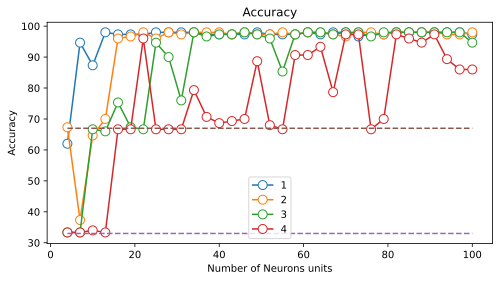

In [35]:
 # show accuracy as a function of model depth
    
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4) ,dpi = 130)

ax.plot(num_neurons,accuracies,'o-',markerfacecolor='w',markersize=9)

ax.plot(num_neurons[[0,-1]],[33,33],'--',)
ax.plot(num_neurons[[0,-1]],[67,67],'--',)

ax.legend(numlayers)

ax.set_xlabel('Number of Neurons units')
ax.set_ylabel('Accuracy')

ax.set_title('Accuracy')

plt.show()

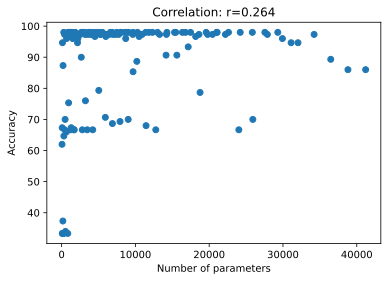

In [34]:
# Maybe it's simply a matter of more parameters -> better performance?

# vectorize for convenience
x = totalparams.flatten()
y = accuracies.flatten()

# correlation between them
r = np.corrcoef(x,y)[0,1]

# scatter plot
plt.figure(figsize = (6,4) ,dpi = 130)
plt.plot(x,y,'o')

plt.xlabel('Number of parameters')
plt.ylabel('Accuracy')

plt.title('Correlation: r=' + str(np.round(r,3)))
plt.show()